In [3]:
using LinearAlgebra
using Plots
# import LinearAlgebra: ⋅
using Catlab
import Catlab.Theories:
  Ob, Hom, dom, codom, compose, ⋅, ∘, id, oplus, ⊕, mzero, swap,
  dagger, dunit, dcounit, mcopy, Δ, delete, ◊, mmerge, ∇, create, □,
  plus, +, zero, coplus, cozero, meet, top, join, bottom,
  proj1, proj2, pair, copair

using Catlab.LinearAlgebra
import Catlab.LinearAlgebra: scalar
using Test
using AlgebraicDynamics.LinRels

In [134]:
Δt = 0.01
Δx = 1
α = 1
k = Δx^2/(Δt*α)

100.0

In [135]:
X,Z = Ob.([ FreeLinearRelations ], [:X,:Z])
lap = Hom(:lap,Z, X⊕X⊕X⊕X)

F = semantics(Dict(X=>LinRelDom(1),
                   Z=>LinRelDom(0),
                   lap=>(zero(LinRelDom(1))⋅LinRel([1 (-(2 + k)) 1 k],1*I(4)))))

#4 (generic function with 1 method)

In [136]:
laplacian = (id(X)⊕scalar(X,-2)⊕id(X))⋅(id(X)⊕plus(X))⋅plus(X)⋅cozero(X);

In [137]:
@test F(laplacian)([0.3, 0.2, 0.1],[])
@test F(laplacian)([0.1, 0.1, 0.1],[])

Test Passed

In [138]:
fit_laplacian = (dunit(X)⊕id(X)⊕id(X))⋅(id(X)⊕swap(X,X)⊕id(X))⋅(id(X)⊕id(X)⊕mmerge(X)⊕dunit(X))⋅(id(X)⊕laplacian⊕id(X))

compose(compose(compose(oplus(dunit(X),id(X),id(X)),oplus(id(X),swap(X,X),id(X))),oplus(id(X),id(X),mmerge(X),dunit(X))),oplus(id(X),compose(compose(compose(oplus(id(X),scalar(X,-2),id(X)),oplus(id(X),plus(X))),plus(X)),cozero(X)),id(X)))

In [139]:
@test F(fit_laplacian)([1,1],[1,1])
@test F(fit_laplacian)([1,2],[2,3])

Test Passed

In [140]:
cap = id(X)⊕create(X)
cup = delete(X)⊕id(X)

oplus(delete(X),id(X))

In [141]:
#
# x1 - o - o - o - y1
#
F(cap⋅fit_laplacian⋅fit_laplacian⋅fit_laplacian⋅cup)([0],[12])

true

In [142]:
#
# x1 - x2 - o - y1 - y2
#
F(fit_laplacian⋅fit_laplacian⋅fit_laplacian)([0,1],[3,4])

true

In [143]:
#
# x1 - o - o - y1
#
F(cap⋅fit_laplacian⋅fit_laplacian⋅cup)([0],[12])

true

In [144]:
solve(F(fit_laplacian⋅fit_laplacian⋅fit_laplacian⋅fit_laplacian⋅fit_laplacian⋅fit_laplacian⋅fit_laplacian⋅fit_laplacian⋅fit_laplacian⋅fit_laplacian⋅fit_laplacian⋅fit_laplacian⋅fit_laplacian⋅fit_laplacian⋅fit_laplacian⋅fit_laplacian⋅fit_laplacian⋅fit_laplacian⋅fit_laplacian⋅fit_laplacian⋅fit_laplacian⋅fit_laplacian⋅fit_laplacian⋅fit_laplacian⋅fit_laplacian⋅fit_laplacian⋅fit_laplacian⋅fit_laplacian⋅fit_laplacian⋅fit_laplacian⋅fit_laplacian⋅fit_laplacian⋅fit_laplacian⋅fit_laplacian⋅fit_laplacian⋅fit_laplacian⋅fit_laplacian⋅fit_laplacian⋅fit_laplacian⋅fit_laplacian), [1,2])

2×1 Array{Float64,2}:
 -0.6985367247883869
 -0.7155742058807832

In [145]:
cup = zero(X)⊕create(X)
cap = delete(X)⊕cozero(X)
t_laplacian = (id(X)⊕scalar(X,-2)⊕id(X))⋅(id(X)⊕plus(X))⋅plus(X);
t_fit_laplacian = (swap(X,X)⊕(create(Z)⋅lap)⊕id(X))⋅(id(X)⊕dcounit(X)⊕(mcopy(X)⋅(id(X)⊕mcopy(X)))⊕id(X)⊕dcounit(X))⋅(dcounit(X)⊕id(X⊕X⊕X))

compose(compose(oplus(swap(X,X),compose(create(Z),lap),id(X)),oplus(id(X),dcounit(X),compose(mcopy(X),oplus(id(X),mcopy(X))),id(X),dcounit(X))),oplus(dcounit(X),id(oplus(X,X,X))))

In [146]:
function time_compose(a, b)
    a_time = length(dom(a).args) - 2
    b_time = length(dom(b).args) - 2
    a_bundle = reduce(⊕,[X for i in 1:a_time])
    b_bundle = reduce(⊕,[X for i in 1:b_time])
    (a⊕id(b_bundle))⋅(id(a_bundle)⊕b)
end

function add_time(ind::Int, size::Int)
    cur_lap = time_laplacian
    for j in 1:ind-1
        cur_lap = id(X) ⊕ cur_lap
    end
    for j in ind+1:size
        cur_lap = cur_lap ⊕ id(X)
    end
    cur_lap
end

function chain_time_lapl(n::Int64)
    if n == 1
        return time_laplacian
    end
    lapls = [add_time(i, n) for i in 1:n]
    chain = compose(lapls...)
end

chain_time_lapl (generic function with 1 method)

In [147]:
lap_2 = time_compose(t_fit_laplacian, t_fit_laplacian)
lap_4 = time_compose(lap_2, lap_2)
lap_8 = time_compose(lap_4, lap_4)
lap_16 = time_compose(lap_8, lap_8)
lap_32 = time_compose(lap_16, lap_16)

compose(oplus(compose(oplus(compose(oplus(compose(oplus(compose(oplus(compose(compose(oplus(swap(X,X),compose(create(Z),lap),id(X)),oplus(id(X),dcounit(X),compose(mcopy(X),oplus(id(X),mcopy(X))),id(X),dcounit(X))),oplus(dcounit(X),id(oplus(X,X,X)))),id(X)),oplus(id(X),compose(compose(oplus(swap(X,X),compose(create(Z),lap),id(X)),oplus(id(X),dcounit(X),compose(mcopy(X),oplus(id(X),mcopy(X))),id(X),dcounit(X))),oplus(dcounit(X),id(oplus(X,X,X)))))),id(oplus(X,X))),oplus(id(oplus(X,X)),compose(oplus(compose(compose(oplus(swap(X,X),compose(create(Z),lap),id(X)),oplus(id(X),dcounit(X),compose(mcopy(X),oplus(id(X),mcopy(X))),id(X),dcounit(X))),oplus(dcounit(X),id(oplus(X,X,X)))),id(X)),oplus(id(X),compose(compose(oplus(swap(X,X),compose(create(Z),lap),id(X)),oplus(id(X),dcounit(X),compose(mcopy(X),oplus(id(X),mcopy(X))),id(X),dcounit(X))),oplus(dcounit(X),id(oplus(X,X,X)))))))),id(oplus(X,X,X,X))),oplus(id(oplus(X,X,X,X)),compose(oplus(compose(oplus(compose(compose(oplus(swap(X,X),compose(cr

In [148]:
A = F((cup⊕id(reduce(⊕,[X for i in 1:32])))⋅lap_32⋅(id(reduce(⊕,[X for i in 1:32]))⊕cap))

LinRel{Array{Float64,2},Array{Float64,2}}([-0.0031507761978481993 -0.0034663164636618295 … 0.003971597887087706 0.0; -0.003604960196971153 -0.0034670597858942223 … 0.004000244324280633 0.0; … ; 5.509594477813969e-6 0.00011348625426585494 … -0.00015555281663247713 0.0; 9.979323062573342e-5 -1.2824222764302753e-5 … 0.04025220450487281 0.0], [-0.003124422345585199 -0.0034323861104923544 … 0.003931969869182872 0.0; -0.003613459464871035 -0.003471736904038563 … 0.0039011379478811566 0.0; … ; 3.98839205060918e-6 0.00011662896941500588 … 0.00023374127280073023 0.0; 9.7875602496313e-5 -1.1429346147211753e-5 … 0.03946523717411842 0.0])

In [149]:
A2 = A⋅A
A4 = A2⋅A2

LinRel{Array{Float64,2},Array{Float64,2}}([0.005118110137673431 0.0 … 0.002161971475436075 0.0; 0.0019408786520684607 0.0 … 0.0011888309731945435 0.0; … ; -0.0035496322752911046 0.0 … 0.004053608594791128 0.0; 0.01021372827687737 0.0 … 0.009072419264688327 0.0], [0.004796444443825432 0.0 … 0.0020412482669346097 0.0; 0.0017041875542658362 0.0 … 0.0011332159972603608 0.0; … ; -0.0031311578685024252 0.0 … 0.004393056408013603 0.0; 0.009310953056992588 0.0 … 0.008544232186615689 0.0])

In [150]:
A4.A

32×168 Array{Float64,2}:
  0.00511811   0.0  -0.00259323   …   0.0143515     0.00216197   0.0
  0.00194088   0.0  -0.00506995       0.0121096     0.00118883   0.0
 -0.00777705   0.0   0.000668223      0.00243293   -0.00122985   0.0
  0.0046487    0.0   0.00787219      -0.00784515   -0.001023     0.0
  0.00528303   0.0  -0.00157524      -0.000789944  -0.00368431   0.0
 -0.000660236  0.0  -0.000527017  …  -0.00489925   -0.00136969   0.0
  0.00202699   0.0   0.00311305      -0.00199669   -0.00411444   0.0
  0.00476178   0.0  -0.00239601       0.0100628    -0.00120001   0.0
 -0.000665168  0.0  -0.002096         0.00130693   -0.00260327   0.0
 -0.000784032  0.0   0.00162583       0.000845371   0.00060397   0.0
 -0.00202878   0.0   0.000316386  …  -0.00232151   -0.00197497   0.0
  0.00262936   0.0  -0.00320681      -0.00114255    0.00252389   0.0
 -0.00332099   0.0  -0.00145781       0.000163308   0.00115497   0.0
  ⋮                               ⋱   ⋮                             
  0.01998

In [151]:
sol = Array{Array{Float64,1},1}()
a_cur = [0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;1;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0]
for i in 1:100
    b = A4.A\a_cur
    a_cur = A4.B*b
    push!(sol, a_cur)
end

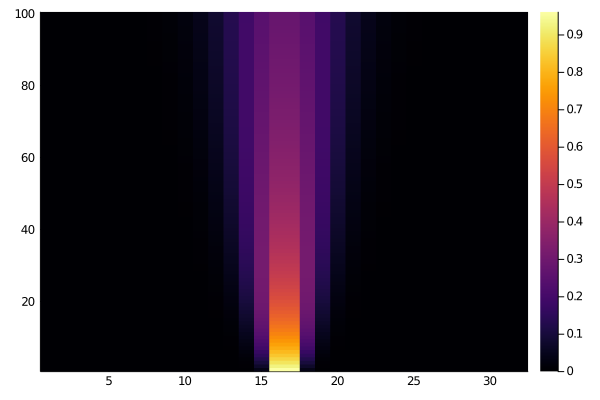

In [152]:
heatmap(1:32, 1:100, (y,x)->sol[x][y])